<a href="https://colab.research.google.com/github/vishnuaswanth/ML_projects/blob/main/Final_M3_MP3_NB_Detection_of_Spam_Emails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Learning
## A program by IIT Madras and TalentSprint
### Mini Project 03 : Detection of Spam/ham Emails

## Learning Objectives

At the end of the mini project, you will be able to

* understand the application of machine learning in the detection of spam emails.
* use a real world dataset.
* Implement various machine learning models.
* compare between different types of classification methods and their pros and cons.

**Packages used:**  
* `Pandas` for data frames and easy to read csv files  
* `Numpy` for array and matrix mathematics functions  
* `Matplotlib` and `Seaborn` for visualization
*  `sklearn` for the metrics and pre-processing



### Introduction

Machine learning is connected with the field of education related to algorithms which continuously keeps on learning from various examples and then applying them to real-world problems.  Classification is a task of Machine Learning which assigns a label value to a specific class and then can identify a particular type to be of one kind or another. The most basic example can be of the mail spam filtration system where one can classify a mail as either “spam” or “not spam”. You will encounter multiple types of classification challenges and there exist some specific approaches for the type of model that might be used for each challenge.

### Dataset Description

The collection consists of '0030228easyham.tar.bz2' and '20030228_spam.tar.bz2' taking from https://spamassassin.apache.org/old/publiccorpus/ i.e. _Apache SpamAssassin’s public datasets_. There are 2500 ham and 500 spam emails in the dataset.


In [ ]:
#@title Download dataset
!wget https://cdn.extras.talentsprint.com/ADSMI/Datasets/spam_or_not_spam.zip
!unzip "spam_or_not_spam.zip"

--2024-05-04 07:40:19--  https://cdn.extras.talentsprint.com/ADSMI/Datasets/spam_or_not_spam.zip
Resolving cdn.extras.talentsprint.com (cdn.extras.talentsprint.com)... 172.105.52.210
Connecting to cdn.extras.talentsprint.com (cdn.extras.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1177632 (1.1M) [application/zip]
Saving to: ‘spam_or_not_spam.zip’

spam_or_not_spam.zi 100%[===================>]   1.12M   933KB/s    in 1.2s    

2024-05-04 07:40:21 (933 KB/s) - ‘spam_or_not_spam.zip’ saved [1177632/1177632]

Archive:  spam_or_not_spam.zip
  inflating: spam_or_not_spam.csv    


In [ ]:
# import the libraries used for machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib notebook
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve

#from sklearn.metrics import plot_precision_recall_curve

In [ ]:
# Print the top 5 data points
# YOUR CODE HERE
# read the data
df = pd.read_csv("spam_or_not_spam.csv")
df
df.head(5)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


### **Exercise 1**: Perform the following

- Exploratory Data Analysis (2 points)
- Preprocessing (1 point)

In [ ]:
# Print the number of spam and not spam emails.
# YOUR CODE HERE
df.isna().any()
df.isna().sum()
df['email'].nunique()
df['email'].drop_duplicates(inplace = True)
df.shape
ham = len(df[df.label == 0])
print("Number of non spam emails: {:}".format((ham)))
spam = len(df[df.label == 1])
print("Number of spam emails: {:}".format((spam)))

Number of non spam emails: 2500
Number of spam emails: 500


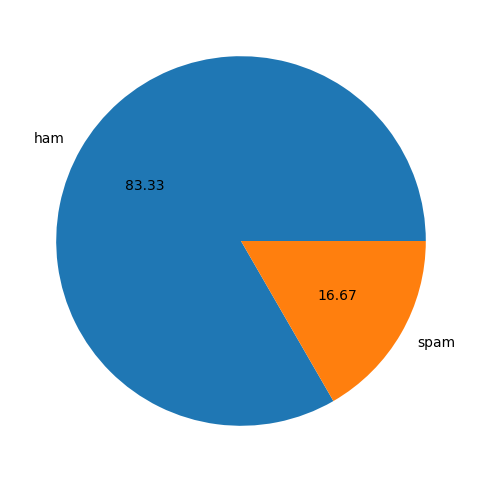

In [ ]:
#Plot distribution of emails with the email-length
# YOUR CODE HERE
plt.figure(figsize=(12,6))
plt.pie(df['label'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()


### **Exercise 2**:
* Implement Count Vectorizer on Train and Test Data (1 Point)

In [ ]:
# Perform the Train test splitting
# YOUR CODE HERE
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=17000)
X_train, X_test, y_train, y_test = train_test_split(df['email'], df['label'], test_size=0.2, random_state=1)



In [ ]:
# Count vectorizer for Train and Test emails
# YOUR CODE HERE
#count_vector = CountVectorizer()
#train_data = count_vector.fit_transform(X_train.values.astype('str')).toarray()
#test_data = count_vector.transform(X_test).toarray()

count_vector = CountVectorizer()
train_data = count_vector.fit_transform(X_train.values.astype('str')).toarray()
test_data = count_vector.transform(X_test.values.astype('str')).toarray()

### **Exercise 3** (4 Points)

Train the model using the 4 ML models:

- Logistic Regression
- SVM
- Naive Bayes
-Decision Tree

**Logistic Regression**

Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

For notational ease, we assume that the target takes values in the set {0,1} for data point . Once fitted, the predict_proba method of LogisticRegression predicts the probability of the positive class P(y_i=1|X_i) as 1/(1+exp(-X_i*w-b)).


**SVM**

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.
SVM algorithm helps to find the best line or decision boundary; this best boundary or region is called as a hyperplane. SVM algorithm finds the closest point of the lines from both the classes. These points are called support vectors. The distance between the vectors and the hyperplane is called as margin. And the goal of SVM is to maximize this margin. The hyperplane with maximum margin is called the optimal hyperplane.
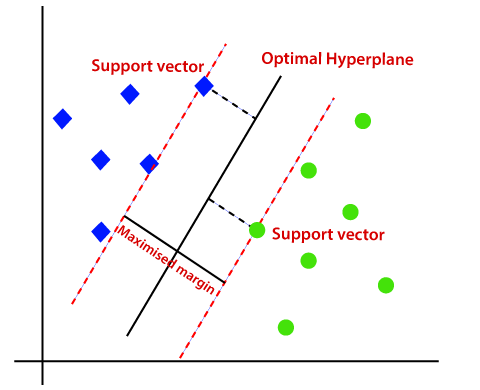


**Decision Tree**

Decision Tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

Construction of Decision Tree: A tree can be “learned” by splitting the source set into subsets based on an attribute value test. This process is repeated on each derived subset in a recursive manner called recursive partitioning. The recursion is completed when the subset at a node all has the same value of the target variable, or when splitting no longer adds value to the predictions. The construction of a decision tree classifier does not require any domain knowledge or parameter setting, and therefore is appropriate for exploratory knowledge discovery. Decision trees can handle high-dimensional data. In general decision tree classifier has good accuracy. Decision tree induction is a typical inductive approach to learn knowledge on classification.

In [ ]:
# Step 1 -Fit all the four models
accuracies = {}
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced',solver='lbfgs', max_iter=10000)
lr.fit(train_data,y_train)

from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(train_data,y_train)


from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(train_data,y_train)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(train_data,y_train)


DecisionTreeClassifier()

In [ ]:
# Step 2 -Train your models
#YOUR CODE HERE
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
Lrc_pred = lr.predict(test_data)
Lrc_accuracy = accuracy_score(y_test,Lrc_pred)
Lrc_precision = precision_score(y_test,Lrc_pred)
print("For Linear Regression")
print("Accuracy - ",Lrc_accuracy)
print("Precision - ",Lrc_precision)
print("F1 Score", f1_score(y_test, Lrc_pred, average="macro"))
print("Recall", recall_score(y_test, Lrc_pred, average="macro"),'\n')

Svm_pred = svm.predict(test_data)
Svm_accuracy = accuracy_score(y_test,Svm_pred)
Svm_precision = precision_score(y_test,Svm_pred)
print("For SVC")
print("Accuracy - ",Svm_accuracy)
print("Precision - ",Svm_precision)
print("F1 Score", f1_score(y_test, Svm_pred, average="macro"))
print("Recall", recall_score(y_test, Svm_pred, average="macro"),'\n')

Nvb_pred = nb.predict(test_data)
Nvb_accuracy = accuracy_score(y_test,Nvb_pred)
Nvb_precision = precision_score(y_test,Nvb_pred)
print("For Navie bayes")
print("Accuracy - ",Nvb_accuracy)
print("Precision - ",Nvb_precision)
print("F1 Score", f1_score(y_test, Nvb_pred, average="macro"))
print("Recall", recall_score(y_test, Nvb_pred, average="macro"),'\n')

Dt_pred = dtc.predict(test_data)
Dt_accuracy = accuracy_score(y_test,Dt_pred)
Dt_precision = precision_score(y_test,Dt_pred)
print("For Decision tree")
print("Accuracy - ",Dt_accuracy)
print("Precision - ",Dt_precision)
print("F1 Score", f1_score(y_test, Dt_pred, average="macro"))
print("Recall", recall_score(y_test, Dt_pred, average="macro"))




For Linear Regression
Accuracy -  0.9866666666666667
Precision -  0.9801980198019802
F1 Score 0.9765583794026294
Recall 0.9694083694083694 

For SVC
Accuracy -  0.9383333333333334
Precision -  1.0
F1 Score 0.8750499518773464
Recall 0.8238095238095238 

For Navie bayes
Accuracy -  0.9183333333333333
Precision -  0.7692307692307693
F1 Score 0.8580526170945206
Recall 0.8567099567099568 

For Decision tree
Accuracy -  0.965
Precision -  0.9117647058823529
F1 Score 0.9387013441919524
Recall 0.9337662337662338


### **Exercise 4**:
* Obtain the Confusion Matrices for all models (2 Point)


 Confusion Matrix Linear Regression


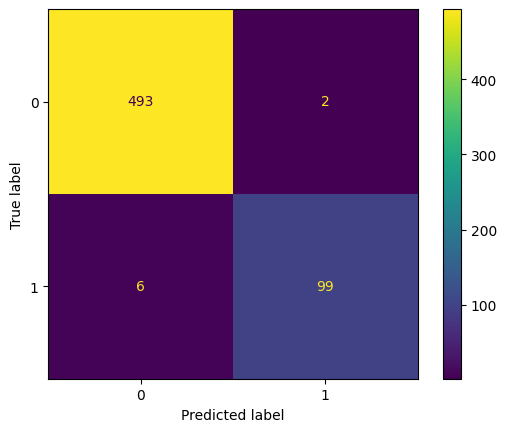


 Confusion Matrix SVC


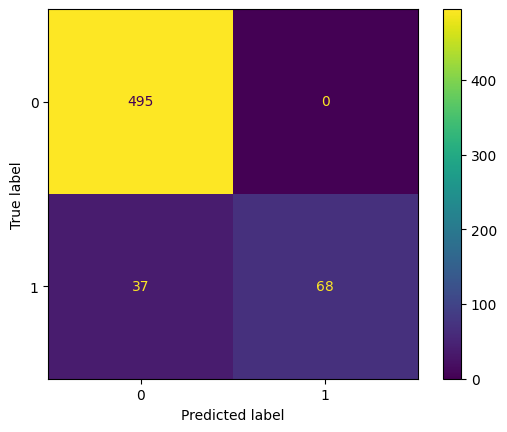


 Confusion Matrix Navie Bayes


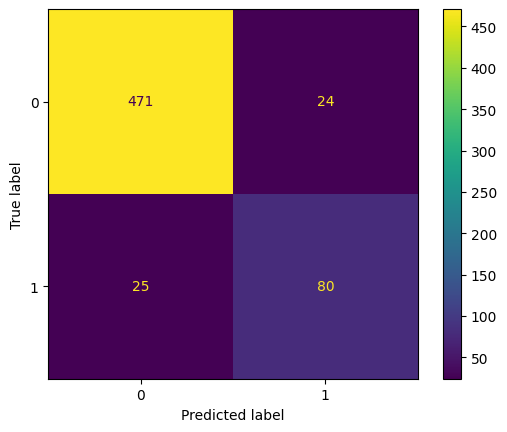


 Confusion Matrix Decision Tree


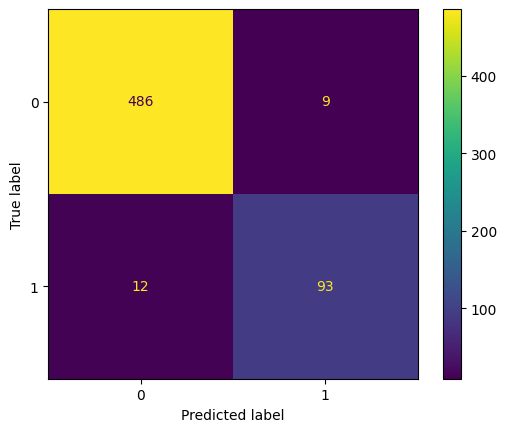

In [ ]:
#YOUR CODE HERE
from sklearn.metrics import ConfusionMatrixDisplay
print("\n", "Confusion Matrix Linear Regression")
ConfusionMatrixDisplay.from_predictions(y_test, Lrc_pred)
plt.show()
print("\n", "Confusion Matrix SVC")
ConfusionMatrixDisplay.from_predictions(y_test, Svm_pred)
plt.show()
print("\n", "Confusion Matrix Navie Bayes")
ConfusionMatrixDisplay.from_predictions(y_test, Nvb_pred)
plt.show()
print("\n", "Confusion Matrix Decision Tree")
ConfusionMatrixDisplay.from_predictions(y_test, Dt_pred)
plt.show()
